# Iris-Flower-Classification

In [10]:
#imports
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Cleaning

In [11]:
df= pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data Visualization

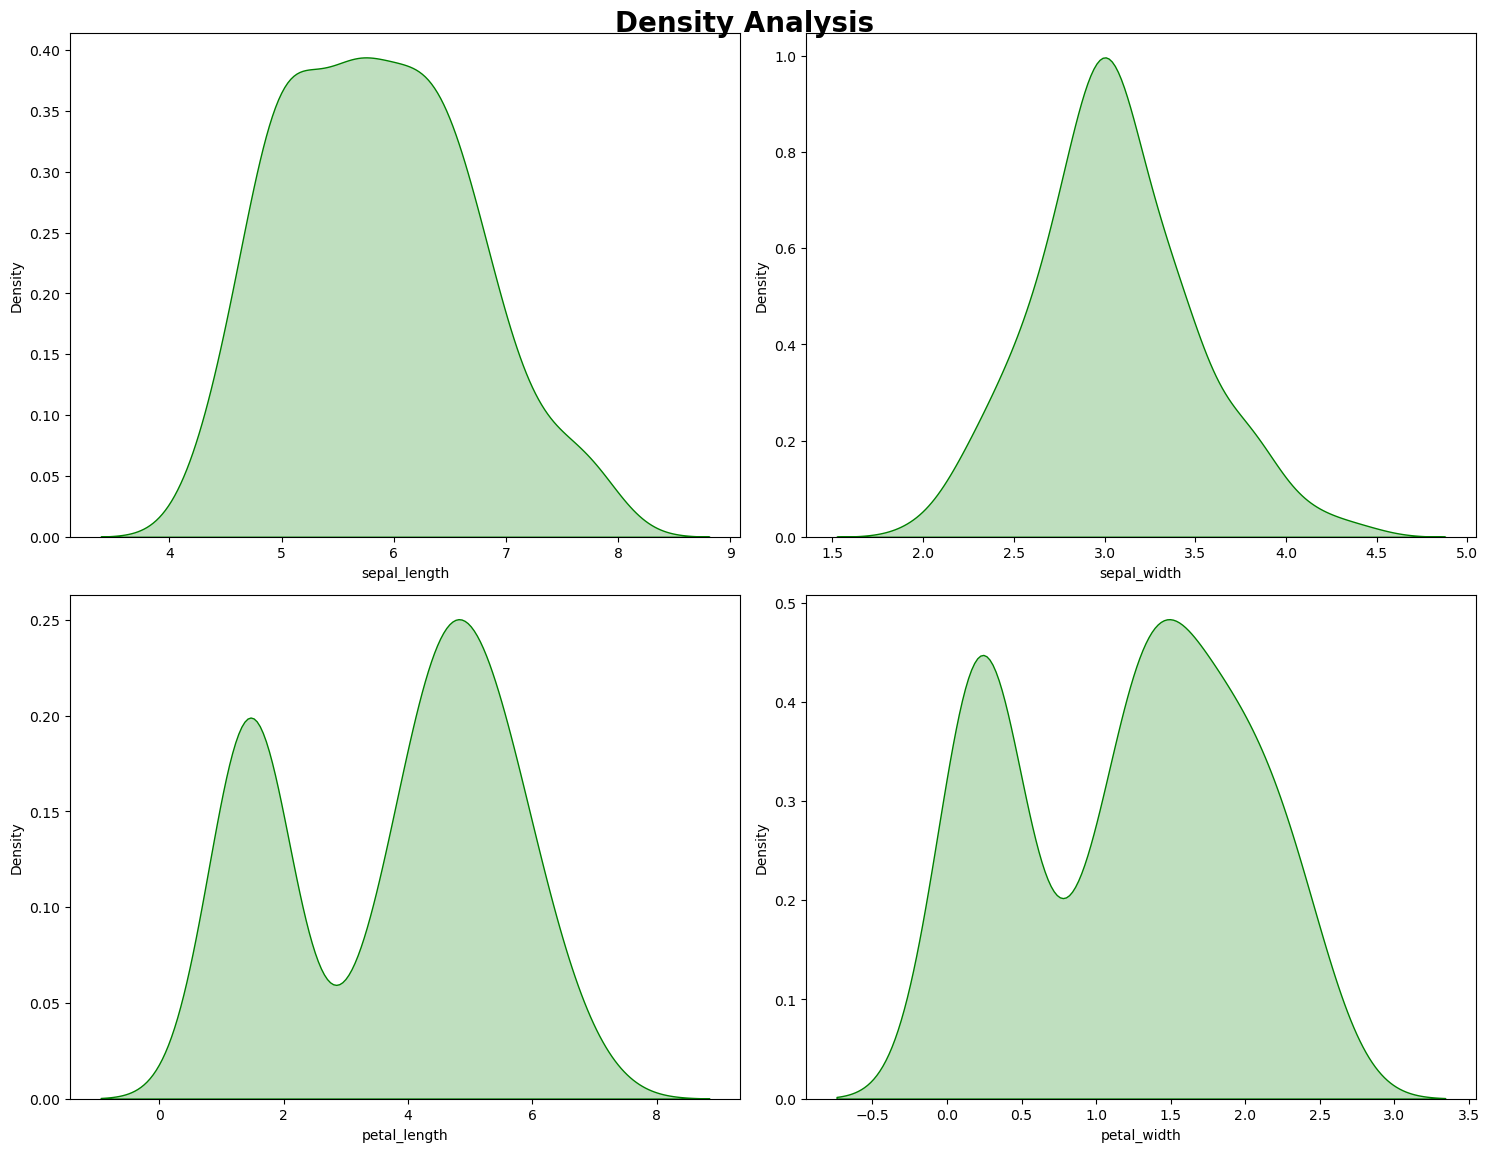

In [93]:
num_feature =[fea for fea in df.columns if df[fea].dtype != object]
plt.figure(figsize=(15,17))
plt.suptitle('Density Analysis',fontsize=20,fontweight='bold')
for i in range (0,len(num_feature)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(x=df[num_feature[i]],fill=True,color='g') 
    plt.xlabel(num_feature[i])
    plt.tight_layout()

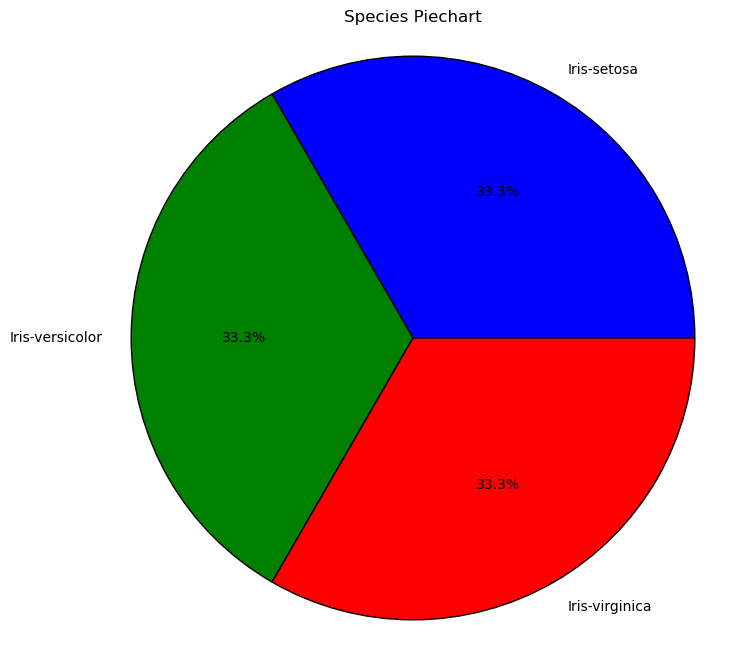

In [121]:
x= df['species'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(x, labels=x.index, autopct='%.1f%%',colors=['blue','green','red'],wedgeprops={'edgecolor': 'black'})
plt.title('Species Piechart')
plt.axis('equal')
plt.show()

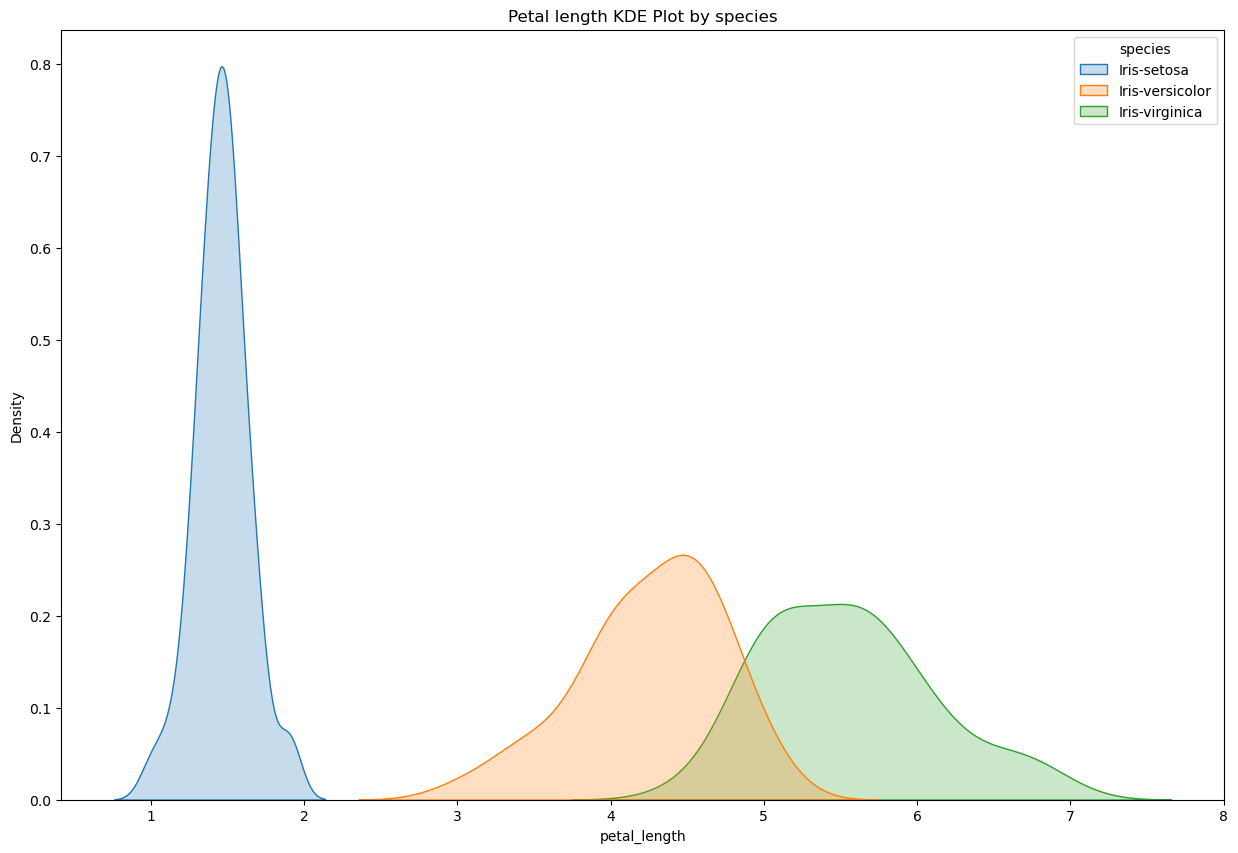

In [123]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df['petal_length'],hue=df['species'],fill=True)
plt.title("Petal length KDE Plot by species")
plt.show()

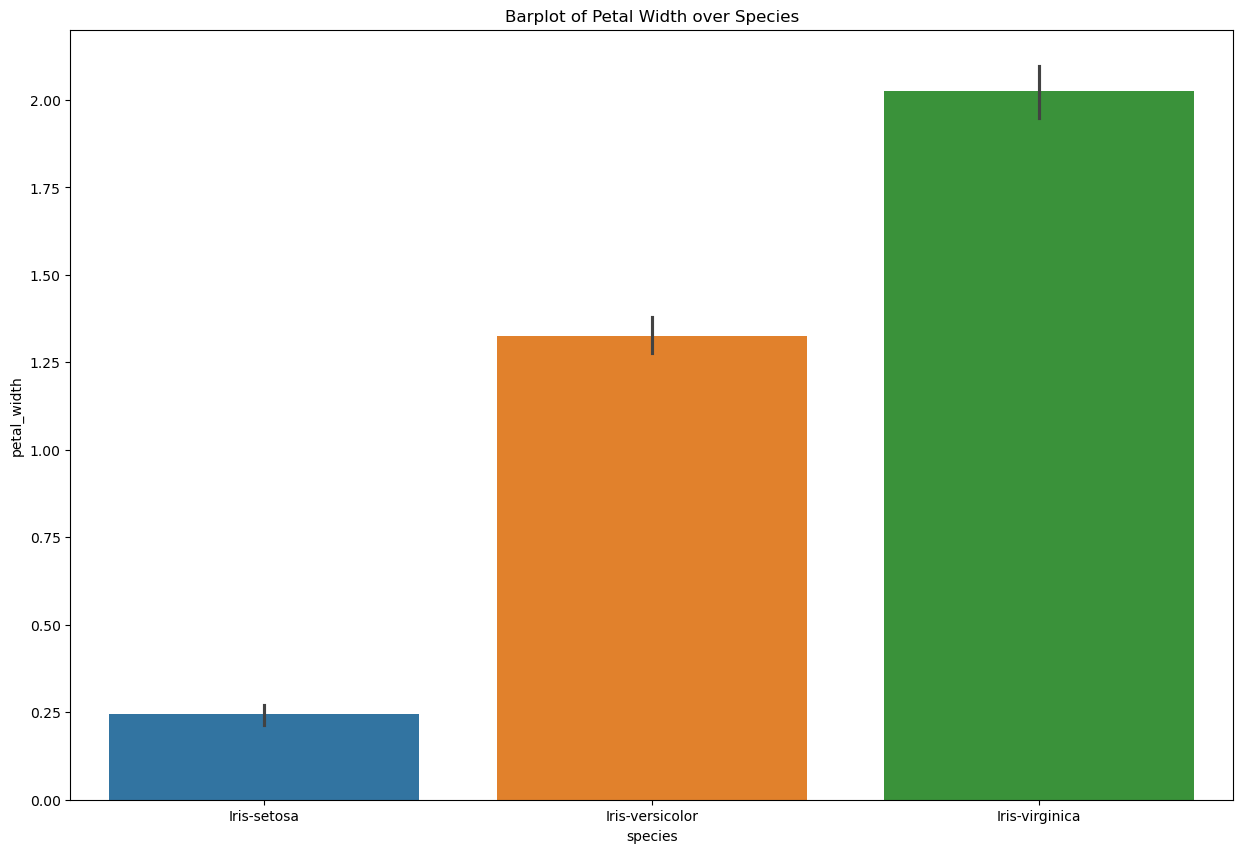

In [125]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['species'],y=df['petal_width'],hue=df['species'])
plt.title("Barplot of Petal Width over Species")
plt.show()

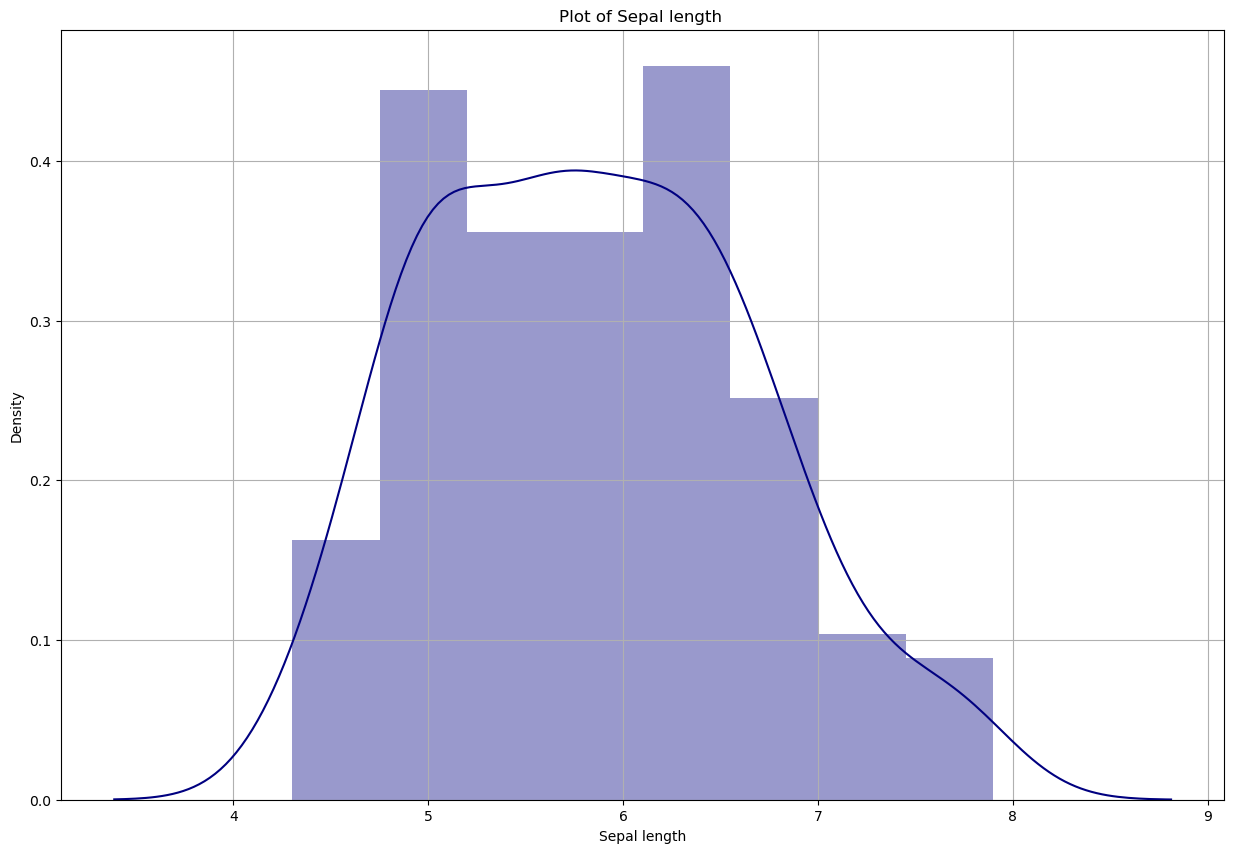

In [169]:
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(x=df['sepal_length'], color='navy')
plt.title("Plot of Sepal length ")
plt.xlabel('Sepal length')
plt.show()

# Encoding

In [173]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [175]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Splitting the Data 

In [179]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [183]:
X_train.shape

(120, 4)

In [185]:
y_train.shape

(120,)

# Applying Logistic Regression

In [191]:
model_lr= LogisticRegression(max_iter=1000, random_state=2)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [207]:
y_pred_lr= model_lr.predict(X_test)
y_pred_lr

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [209]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr }')
print('\nConfusion Matrix:\n',conf_matrix_lr)
print('\nClassification Report:\n',class_report_lr )

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [225]:
accuracy_perc=accuracy_lr*100
print('Accuracy in Percentage derived from Logistic regression is :',accuracy_perc,'%')

Accuracy in Percentage derived from Logistic regression is : 96.66666666666667 %


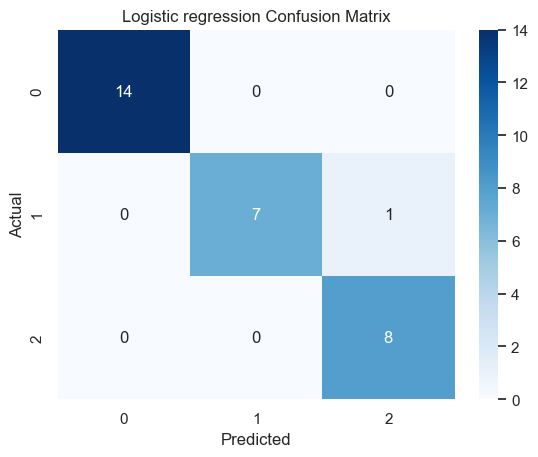

In [246]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Applying Random Forest Classifier

In [205]:
model_rf= RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [211]:
y_pred_rf= model_rf.predict(X_test)
y_pred_rf

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [213]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf }')
print('\nConfusion Matrix:\n',conf_matrix_rf)
print('\nClassification Report:\n',class_report_rf )

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [227]:
acc_perc=accuracy_rf*100
print('Accuracy in Percentage from Random Forest Classifier is:',acc_perc,'%')

Accuracy in Percentage from Random Forest Classifier is: 96.66666666666667 %


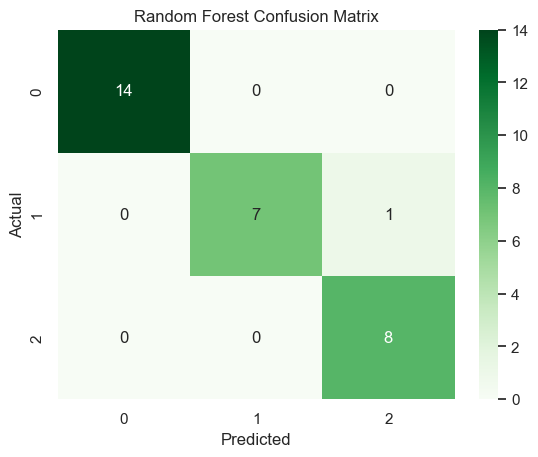

In [254]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluating Model

In [244]:
#through random forest classifier
data =(6.1, 2.9, 4.1, 1.2)
arr= np.array(data)
arr_reshaped= arr.reshape(1,-1)
prediction = model_rf.predict(arr_reshaped)
print('The prediction is ', prediction)

The prediction is  [1]


# Note:

the prediction of iris is in the terms of label encoding , i.e. [0] is for Iris-setosa, [1] is for Iris-versicolor & [2] is for Iris-virginica